Importing necessary modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset storing in dataframe 


In [3]:
# Load dataset
df = pd.read_csv("D:/Projects/Employee Salary Prediction usnig ML/Dataset/Salary_Data.csv")

In [4]:
# Display first few rows
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


Basic Info & Null Checks

In [5]:
# Dataset shape and types
print("Shape:", df.shape)

Shape: (6704, 6)


In [6]:
print("\nData types:\n", df.dtypes)


Data types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [7]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [8]:
# Fill missing numerical columns with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)

C:\Users\anirb\AppData\Local\Temp\ipykernel_20896\970159117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\anirb\AppData\Local\Temp\ipykernel_20896\970159117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [9]:
# Fill missing categorical columns with mode (most frequent)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)

C:\Users\anirb\AppData\Local\Temp\ipykernel_20896\1861355770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\anirb\AppData\Local\Temp\ipykernel_20896\1861355770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [10]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


Summary Statistics

In [11]:
# Summary statistics for numeric columns
df.describe()

,Age,Years of Experience,Salary
count,6704.000000,6704.000000,6704.000000
mean,33.620376,8.094197,115326.720913
std,7.613548,6.057691,52766.493471
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [12]:
# Unique values in categorical columns
print("Gender:\n", df['Gender'].value_counts(), "\n")



Gender:
 Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64 



In [13]:
print("Education Level:\n", df['Education Level'].value_counts(), "\n")


Education Level:
 Education Level
Bachelor's Degree    2270
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64 



In [14]:
print("Job Title:\n", df['Job Title'].value_counts(), "\n")

Job Title:
 Job Title
Software Engineer                 520
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64 



Standardize Categorical Text Columns

In [15]:
# Normalize Education Level
df['Education Level'] = df['Education Level'].str.lower().str.strip()

In [16]:
# Map common terms to standard labels
edu_mapping = {
    "bachelor's degree": "bachelor's",
    "bachelors": "bachelor's",
    "master's degree": "master's",
    "masters": "master's",
    "phd": "phd",
    "ph.d.": "phd",
    "ph.d": "phd",
    "phd.": "phd",
    "high school": "high school"
}
df['Education Level'] = df['Education Level'].replace(edu_mapping)

In [19]:
# Normalize Gender
df['Gender'] = df['Gender'].str.title().str.strip()

In [20]:
# Normalize Job Titles
df['Job Title'] = df['Job Title'].str.title().str.strip()

In [21]:
# Confirm cleaned values
print("Unique Education Levels:\n", df['Education Level'].value_counts(), "\n")
print("Unique Genders:\n", df['Gender'].value_counts(), "\n")
print("Sample Job Titles:\n", df['Job Title'].value_counts().head(30))

Unique Education Levels:
 Education Level
bachelor's     3026
master's       1861
phd            1369
high school     448
Name: count, dtype: int64 

Unique Genders:
 Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64 

Sample Job Titles:
 Job Title
Software Engineer                   520
Data Scientist                      453
Software Engineer Manager           376
Data Analyst                        363
Senior Project Engineer             318
Product Manager                     313
Full Stack Engineer                 309
Front End Developer                 272
Marketing Manager                   255
Senior Software Engineer            244
Back End Developer                  244
Marketing Coordinator               158
Junior Sales Associate              142
Financial Manager                   134
Marketing Analyst                   132
Software Developer                  125
Operations Manager                  114
Human Resources Manager             104
Dir

Plot Salary Distribution

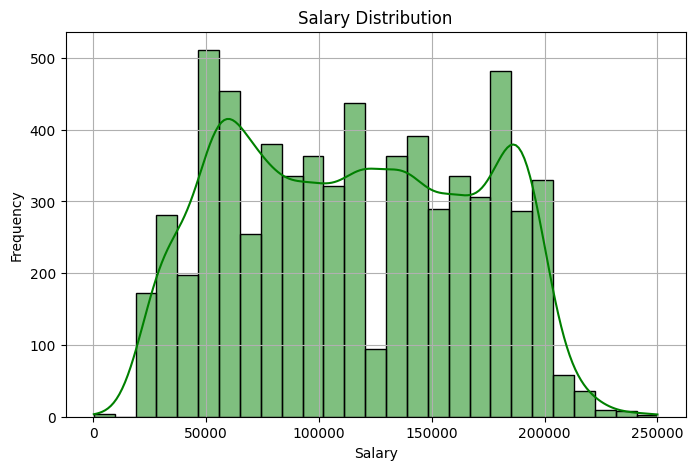

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, color='green')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


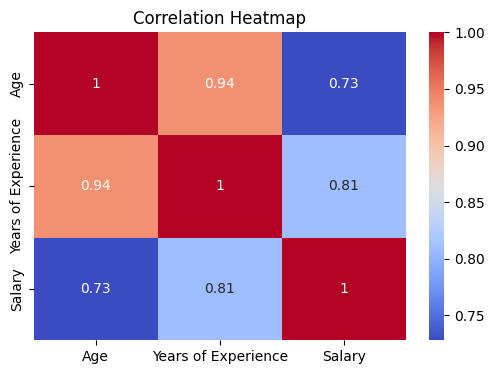

In [23]:
# Numeric correlations
# Correlation matrix for numeric features
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Years of Experience', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Define Features, Target, and Train-Test Split

In [24]:
# Features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (5363, 5)
X_test shape: (1341, 5)


In [25]:
# Preprocessing & modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Save model
import joblib

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

Preprocessing Pipeline

In [26]:
# Define numeric and categorical columns
num_cols = ['Age', 'Years of Experience']
cat_cols = ['Gender', 'Education Level', 'Job Title']

# Preprocessor pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


Training and Comparing Algorithms

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import numpy as np
import joblib

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

# Train-test split (ensure same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to hold R² test scores
model_scores = {}

# Evaluate each model on test set
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    r2 = r2_score(y_test, preds)
    model_scores[name] = r2
    print(f"{name}: R² = {r2:.4f}")



Linear Regression: R² = 0.8361
Ridge Regression: R² = 0.8359
Lasso Regression: R² = 0.8361
ElasticNet: R² = 0.6421
Decision Tree: R² = 0.9675
Random Forest: R² = 0.9719
Gradient Boosting: R² = 0.9101
XGBoost: R² = 0.9632
KNN Regressor: R² = 0.9518
SVR: R² = 0.0121


In [28]:
# Identify best model
best_model_name = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model_name]
print(f"\n✅ Best model: {best_model_name} with R² = {best_score:.4f}")



✅ Best model: Random Forest with R² = 0.9719


In [29]:
# Save the best model
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", models[best_model_name])
])
final_pipeline.fit(X_train, y_train)
joblib.dump(final_pipeline, "salary_prediction_model.pkl")
print("📦 Saved best model as 'salary_prediction_model.pkl'")

📦 Saved best model as 'salary_prediction_model.pkl'


Comparison of the algorithms Visually 

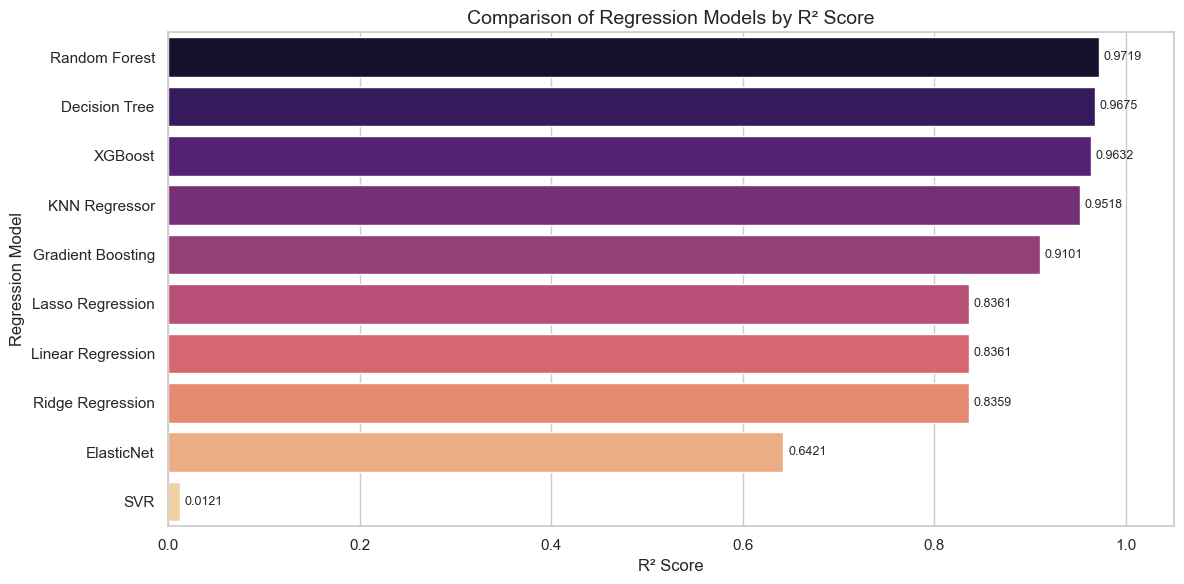

In [30]:
# Convert model_scores dictionary to DataFrame
import pandas as pd
results_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'R2 Score'])

# Sort by R² Score (optional, for better visualization)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# Set seaborn style
sns.set(style='whitegrid')

# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='magma')

# Titles and labels
plt.title('Comparison of Regression Models by R² Score', fontsize=14)
plt.xlabel('R² Score')
plt.ylabel('Regression Model')

# Show values on the bars
for index, value in enumerate(results_df['R2 Score']):
    plt.text(value + 0.005, index, f"{value:.4f}", va='center', fontsize=9)

plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()


Load the Saved Model and Predict Salary

In [31]:
import pandas as pd
import joblib  # or use pickle if you saved using pickle


In [32]:
model = joblib.load('salary_prediction_model.pkl')

In [33]:
# Sample input for prediction (same structure as training data)
new_employee = {
    'Age': [28],
    'Gender': ['Male'],
    'Education Level': ["Master's Degree"],
    'Job Title': ['Data Scientist'],
    'Years of Experience': [4]
}

# Convert to DataFrame
new_employee_df = pd.DataFrame(new_employee)

In [34]:
predicted_salary = model.predict(new_employee_df)[0]
print(f"Predicted Salary: ₹{predicted_salary:,.2f}") # This will output the predicted salary for the new employee

Predicted Salary: ₹119,737.00
